# Train/test classifier

In [0]:
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import log_loss
from sklearn.metrics import precision_recall_curve
from sklearn import metrics

# Hide deprecated warnings
import warnings
warnings.filterwarnings('ignore')

# Mount local files
from google.colab import drive
drive.mount('/gdrive')

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [0]:
#https://towardsdatascience.com/feature-selection-using-random-forest-26d7b747597f

## Load the data

In [0]:
#fv = pd.read_csv("/Users/AirMorena/Desktop/final_proj/csv/google_play_store/160619final_feature_vector.csv")
# Load data from the folder where I uploaded the csv file
fv = pd.read_csv("/gdrive/My Drive/AI/CURRICULUM/Giovanna/160619final_feature_vector.csv")

In [0]:
fv.shape

(9351, 74)

In [0]:
fv.head()

,Installs_group,st_Rating,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,Category_ENTERTAINMENT,Category_EVENTS,Category_FAMILY,Category_FINANCE,Category_FOOD_AND_DRINK,Category_GAME,Category_HEALTH_AND_FITNESS,Category_HOUSE_AND_HOME,Category_LIBRARIES_AND_DEMO,Category_LIFESTYLE,Category_MAPS_AND_NAVIGATION,Category_MEDICAL,Category_NEWS_AND_MAGAZINES,Category_PARENTING,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,reviews_levels_high,reviews_levels_low,reviews_levels_medium,Current Ver_clean_levels_high,Current Ver_clean_levels_low,Current Ver_clean_levels_medium,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,Size_group_big,Size_group_small,Type_Free,Type_Paid,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated,Android Ver_levels_high,Android Ver_levels_low
0,0,-0.179640,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,1,-0.569116,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,1,0.988789,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
3,1,0.599313,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4,0,0.209837,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [0]:
fv.columns.tolist()

['Installs_group',
 'st_Rating',
 'Category_ART_AND_DESIGN',
 'Category_AUTO_AND_VEHICLES',
 'Category_BEAUTY',
 'Category_BOOKS_AND_REFERENCE',
 'Category_BUSINESS',
 'Category_COMICS',
 'Category_COMMUNICATION',
 'Category_DATING',
 'Category_EDUCATION',
 'Category_ENTERTAINMENT',
 'Category_EVENTS',
 'Category_FAMILY',
 'Category_FINANCE',
 'Category_FOOD_AND_DRINK',
 'Category_GAME',
 'Category_HEALTH_AND_FITNESS',
 'Category_HOUSE_AND_HOME',
 'Category_LIBRARIES_AND_DEMO',
 'Category_LIFESTYLE',
 'Category_MAPS_AND_NAVIGATION',
 'Category_MEDICAL',
 'Category_NEWS_AND_MAGAZINES',
 'Category_PARENTING',
 'Category_PERSONALIZATION',
 'Category_PHOTOGRAPHY',
 'Category_PRODUCTIVITY',
 'Category_SHOPPING',
 'Category_SOCIAL',
 'Category_SPORTS',
 'Category_TOOLS',
 'Category_TRAVEL_AND_LOCAL',
 'Category_VIDEO_PLAYERS',
 'Category_WEATHER',
 'reviews_levels_high',
 'reviews_levels_low',
 'reviews_levels_medium',
 'Current Ver_clean_levels_high',
 'Current Ver_clean_levels_low',
 'Curr

In [0]:
#Hyperparameters:
#1)max_depth. This indicates how deep the tree can be. The deeper the tree, the more splits 
#it has and it captures more information about the data. We fit a decision tree
#with depths ranging from 1 to 32 and plot the training and test auc scores.

#2)min_samples_split
#min_samples_split represents the minimum number of samples required to split an internal node. 
#This can vary between considering at least one sample at each node to considering all of the samples at each node. 
#When we increase this parameter, the tree becomes more constrained as it has to consider more samples at each node. 
#Here we will vary the parameter from 10% to 100% of the samples

#3)min_samples_leaf: is The minimum number of samples required to be at a leaf node
#This parameter is similar to min_samples_splits, however, 
#this describe the minimum number of samples of samples at the leafs, the base of the tree.

#4)max_features:
#max_features represents the number of features to consider when looking for the best split.
#5) random state to 42 which means the results will be the same each time I run the split for reproducible results.

In [0]:
fv.head()

,Installs_group,st_Rating,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,Category_ENTERTAINMENT,Category_EVENTS,Category_FAMILY,Category_FINANCE,Category_FOOD_AND_DRINK,Category_GAME,Category_HEALTH_AND_FITNESS,Category_HOUSE_AND_HOME,Category_LIBRARIES_AND_DEMO,Category_LIFESTYLE,Category_MAPS_AND_NAVIGATION,Category_MEDICAL,Category_NEWS_AND_MAGAZINES,Category_PARENTING,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,reviews_levels_high,reviews_levels_low,reviews_levels_medium,Current Ver_clean_levels_high,Current Ver_clean_levels_low,Current Ver_clean_levels_medium,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,Size_group_big,Size_group_small,Type_Free,Type_Paid,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated,Android Ver_levels_high,Android Ver_levels_low
0,0,-0.179640,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,1,-0.569116,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,1,0.988789,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
3,1,0.599313,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4,0,0.209837,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0


## Train/Test Split

In [0]:
X = fv.drop(['Installs_group'], axis=1)
y = fv['Installs_group']
# we keep 33% of data for test dataset: cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

![gini](giniindex.png)

## Decision Tree - Grid Search & Cross Validation

See the list of scoring functions [here](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter)

![decision_tree](decision_tree_hyper.png)

In [0]:
# Initialize the model
tree = DecisionTreeClassifier()

# Define the values of the hyperparameters to optimize
max_depth = [5, 10]#[10, 50, 100, None]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
max_leaf_nodes = [2, 5, 10]
max_features = [10, 15, 20]#['sqrt', 'log2']
hyperparameters = dict(max_depth=max_depth, min_samples_split=min_samples_split,
                      min_samples_leaf=min_samples_leaf, max_leaf_nodes=max_leaf_nodes)

# Initialize GridSearch/Cross-validation
clf = GridSearchCV(tree, hyperparameters, cv=5, scoring='accuracy')

# Run the optimization
best_model = clf.fit(X_train, y_train)

In [0]:
# Results
best_model.cv_results_

{'mean_fit_time': array([0.01495953, 0.01356773, 0.01238575, 0.01226034, 0.01298242,
        0.01196275, 0.01220684, 0.01225801, 0.01228991, 0.01524558,
        0.01520424, 0.01590595, 0.01516128, 0.01496553, 0.01396775,
        0.01490917, 0.01412258, 0.01428285, 0.01535311, 0.01482644,
        0.01523705, 0.01566176, 0.01482401, 0.01600718, 0.01610575,
        0.01484709, 0.01502652, 0.0116075 , 0.01171708, 0.01131248,
        0.01104298, 0.01172705, 0.01118183, 0.01147614, 0.0113287 ,
        0.0117979 , 0.01401429, 0.01393113, 0.01417713, 0.01424937,
        0.01490226, 0.0141871 , 0.01393905, 0.01408625, 0.01404614,
        0.01676941, 0.0161449 , 0.01565642, 0.01610246, 0.0156127 ,
        0.01629128, 0.01620779, 0.01612334, 0.01604419]),
 'mean_score_time': array([0.00298033, 0.00285659, 0.00278077, 0.00264902, 0.00265584,
        0.00255718, 0.00261974, 0.00255733, 0.00264459, 0.00294333,
        0.00278287, 0.00289893, 0.00338492, 0.0027164 , 0.00224447,
        0.00230021, 0.

In [0]:
# Set of hyperparameters from the model that perform the best on average from all cross validations
best_model.best_params_

{'max_depth': 5,
 'max_leaf_nodes': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [0]:
# Average value for the metric for the model evaluation in the best set of hyperparameters
best_model.best_score_

0.9107715813598166

#### Visualize the results of hyperparameter optimization grid search

In [0]:
params = best_model.cv_results_['params']
#train_scores = best_model.cv_results_['mean_train_score']
test_scores = best_model.cv_results_['mean_test_score']
times = best_model.cv_results_['mean_fit_time']

GS_performance = pd.DataFrame({'max_depth': [i['max_depth'] for i in params],
                                 'max_leaf_nodes': [i['max_leaf_nodes'] for i in params],
                               'min_samples_leaf': [i['min_samples_leaf'] for i in params],
                               'min_samples_split': [i['min_samples_split'] for i in params],
#                                 'train_score': train_scores,
                                 'test_score': test_scores,
                                 'fit_time': times})

In [0]:
# _=sns.heatmap(GS_performance[['max_depth','max_leaf_nodes','train_score']].pivot_table(values='train_score', 
#                                   index='max_depth', columns='max_leaf_nodes'), annot=True, fmt='.10f', cmap='Blues')
# _=plt.title("Performance on the model based on hyperparmeters with the train set")

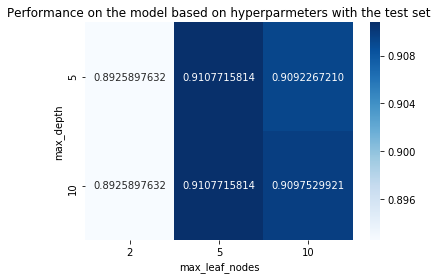

In [0]:
_=sns.heatmap(GS_performance[['max_depth','max_leaf_nodes','test_score']].pivot_table(values='test_score', 
                               index='max_depth', columns='max_leaf_nodes'), annot=True, fmt='.10f', cmap='Blues')
_=plt.title("Performance on the model based on hyperparmeters with the test set")

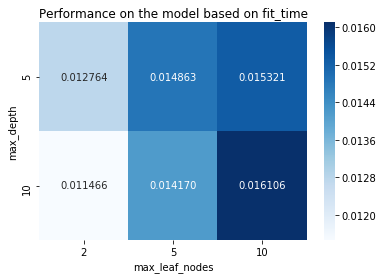

In [0]:
_=sns.heatmap(GS_performance[['max_depth','max_leaf_nodes','fit_time']].pivot_table(values='fit_time', 
                           index='max_depth', columns='max_leaf_nodes'), annot=True, fmt='.6f', cmap='Blues')
_=plt.title("Performance on the model based on fit_time")

In [0]:
y_pred = best_model.predict(X_test)

## Decision Tree - Visualization

In [0]:
# Initialize the model
tree_viz = DecisionTreeClassifier(max_depth=5,
 max_leaf_nodes=5,
 min_samples_leaf=1,
 min_samples_split=2)
#(class_weight=None, criterion=’gini’, max_depth=3,
 #max_features=None, max_leaf_nodes=None,
 #min_impurity_split=1e-07, min_samples_leaf=1,
 #min_samples_split=2, min_weight_fraction_leaf=0.0,
# presort=False, random_state=None, splitter=’best’)

# Train with a reduced number of columns to see how does it work
#tree_viz.fit(X_train.iloc[:,:10], y_train)
tree_viz.fit(X_train, y_train) #           
             

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=5,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
X_train.columns.tolist()[37]

'Current Ver_clean_levels_high'

X35: reviews_levels_low
X36: reviews_levels_medium
X51: Type_Free
X37: Current Ver_clean_levels_high


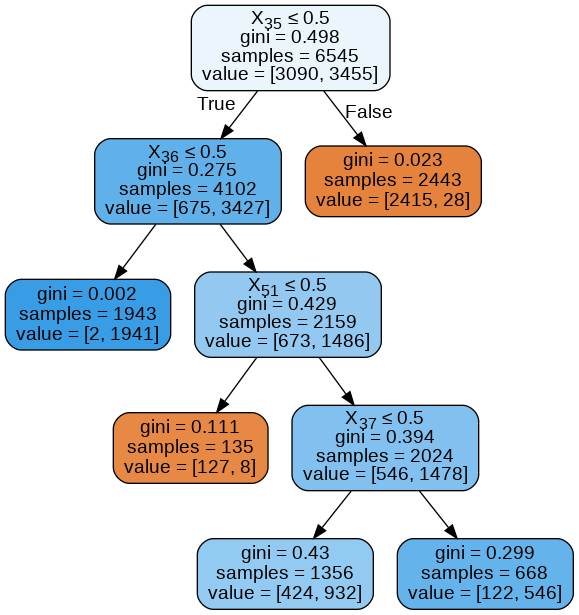

In [0]:
# Show Xs names
X_names = X_train.iloc[:,:5].columns.tolist()
print("X35: reviews_levels_low\nX36: reviews_levels_medium\nX51: Type_Free\nX37: Current Ver_clean_levels_high")

dot_data = StringIO()
export_graphviz(tree_viz, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

In [0]:
y_pred = tree_viz.predict(X_test)

## Decision Tree - Best Model Evaluation

![precision_recall](prec_recall.png "Title")

In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.80      0.88      1316
           1       0.85      0.99      0.91      1490

    accuracy                           0.90      2806
   macro avg       0.92      0.90      0.90      2806
weighted avg       0.91      0.90      0.90      2806



In [0]:
# Compute confusion matrix to evaluate the accuracy of a classification

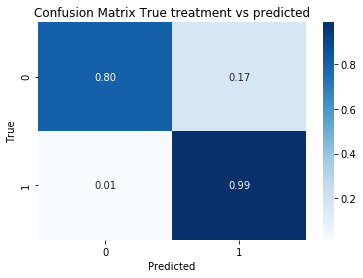

In [0]:
# Normalized (by the number of interviewed people in each class) confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm = cm.astype('float') / cm.sum(axis=1)

_=sns.heatmap(cm, annot=True, cmap='Blues', fmt='.2f')
_=plt.xlabel('Predicted')
_=plt.ylabel('True')
_=plt.title("Confusion Matrix True treatment vs predicted")

### What is the best probability threshold to decide if, based on the given situation, the person is taking mental treatment?

In [0]:
# Predict the probabilities of being taking treatment
y_pred_test = tree_viz.predict_proba(X_test)

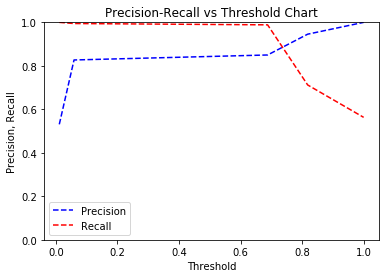

In [0]:
# Visualize how the precision and the recall changes when moving the threshold
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_test[:, 1]) 
pr_auc = metrics.auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
_=plt.ylim([0,1])

In [0]:
thresholds

array([0.01146132, 0.05925926, 0.68731563, 0.81736527, 0.99897066])

### What is the area under the curve according to the optimal threshold?

![ROC_curve](ROC_curves.png "Title")

In [0]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_test[:, 1])

AUC: 0.958


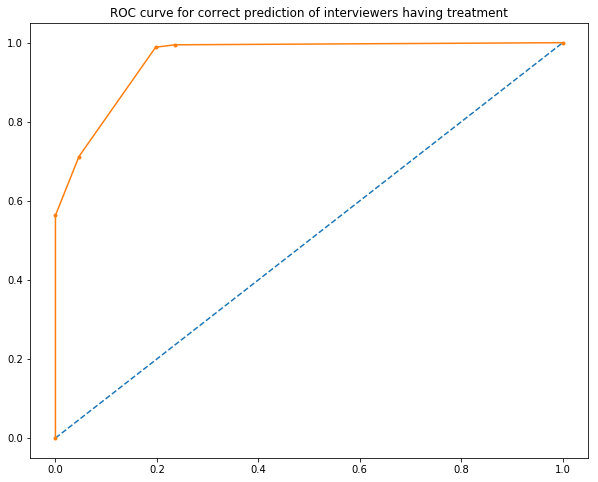

In [0]:
auc = roc_auc_score(y_test, y_pred_test[:, 1])
print('AUC: %.3f' % auc)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test[:, 1])

# plot random case
_=plt.figure(figsize=(10, 8))
_=plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
_=plt.plot(fpr, tpr, marker='.')
_=plt.title("ROC curve for correct prediction of interviewers having treatment")